# AG2 - Actividad Guiada 2
Nombre: Alfonso Cabrero de Diego <br>
Link:   [https://drive.google.com/file/d/16J0uMoVPFn4ZG1jXJMG3lHxh88hobmK8/view?usp=sharing](https://drive.google.com/file/d/16J0uMoVPFn4ZG1jXJMG3lHxh88hobmK8/view?usp=sharing) <br>
Github: [https://github.com/acabrerod/miar/tree/main/03_miar_optimization_algorithms/exercises/Algoritmos_AG2.ipynb](https://github.com/acabrerod/miar/tree/main/03_miar_optimization_algorithms/exercises/Algoritmos_AG2.ipynb)<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

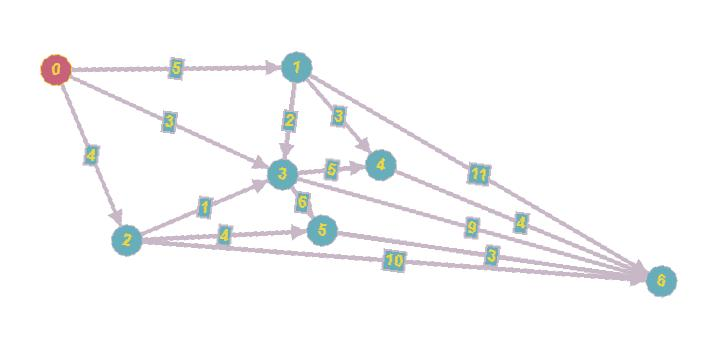

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [2]:
#Viaje por el rio - Programación dinámica
################################################################################

tarifas = [
  [0,5,4,3,float("inf"),999,999],   # desde nodo 0
  [999,0,999,2,3,999,11],           # desde nodo 1
  [999,999, 0,1,999,4,10],          # desde nodo 2
  [999,999,999, 0,5,6,9],
  [999,999, 999,999,0,999,4],
  [999,999, 999,999,999,0,3],
  [999,999,999,999,999,999,0]
]

tarifas

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [3]:
def calcular_precios(tarifas: list[list[int]]) -> tuple:
  """
  Calcula la tabla de precios y rutas

   - precios -- es una matriz con el mejor precio para ir de un nodo a otro
   - rutas   -- contiene los nodos intermedios para ir de un nodo a otro
  """
  # Total de nodos
  n = len(tarifas[0])

  # Inicialización con costes muy altos por defecto
  precios = [
    [ 9999  for _ in range(n) ]
    for _ in range(n)
  ]
  # Rutas para pasar por los nodos
  rutas = [
    [ ""  for _ in range(n) ]
    for _ in range(n)
  ]

  for i in range(n - 1):
    rutas[i][i] = i       # Para ir de i a i se "pasa por i"
    precios[i][i] = 0     # Para ir de i a i se se paga 0

    # Cálculo del precio de i con el resto
    for j in range(i + 1, n):
      minimo = tarifas[i][j] # Coste base de i a j
      rutas[i][j] = i

      # Busca rutas de i a j pasando por nodos intermedios k
      for k in range(i, j):
        if precios[i][k] + tarifas[k][j] < minimo:
            minimo = min(minimo, precios[i][k] + tarifas[k][j])

            # Anota que para ir de i a j hay que pasar por k
            rutas[i][j] = k

        precios[i][j] = minimo

  return precios, rutas

In [4]:
precios, rutas = calcular_precios(tarifas)

print("Precios")
for i in range(len(tarifas)):
  print(precios[i])

print("\nRutas")
for i in range(len(tarifas)):
  print(rutas[i])

Precios
[0, 5, 4, 3, 8, 8, 11]
[9999, 0, 999, 2, 3, 8, 7]
[9999, 9999, 0, 1, 6, 4, 7]
[9999, 9999, 9999, 0, 5, 6, 9]
[9999, 9999, 9999, 9999, 0, 999, 4]
[9999, 9999, 9999, 9999, 9999, 0, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

Rutas
[0, 0, 0, 0, 1, 2, 5]
['', 1, 1, 1, 1, 3, 4]
['', '', 2, 2, 3, 2, 5]
['', '', '', 3, 3, 3, 3]
['', '', '', '', 4, 4, 4]
['', '', '', '', '', 5, 5]
['', '', '', '', '', '', '']


In [5]:
def calcular_ruta(ruta, desde, hasta):
  """ Calcula la ruta entre dos nodos con recursividad """
  if desde == hasta:
    return desde

  # Ruta con nodo intermedio
  ruta = calcular_ruta(rutas, desde, rutas[desde][hasta])
  return f"{ruta} -> {hasta}"


for origen in range(7):
  for destino in range(origen + 1, 7):
    print(f"La ruta entre {origen} y {destino} es: {calcular_ruta(rutas, origen, destino)}")
  print()

La ruta entre 0 y 1 es: 0 -> 1
La ruta entre 0 y 2 es: 0 -> 2
La ruta entre 0 y 3 es: 0 -> 3
La ruta entre 0 y 4 es: 0 -> 1 -> 4
La ruta entre 0 y 5 es: 0 -> 2 -> 5
La ruta entre 0 y 6 es: 0 -> 2 -> 5 -> 6

La ruta entre 1 y 2 es: 1 -> 2
La ruta entre 1 y 3 es: 1 -> 3
La ruta entre 1 y 4 es: 1 -> 4
La ruta entre 1 y 5 es: 1 -> 3 -> 5
La ruta entre 1 y 6 es: 1 -> 4 -> 6

La ruta entre 2 y 3 es: 2 -> 3
La ruta entre 2 y 4 es: 2 -> 3 -> 4
La ruta entre 2 y 5 es: 2 -> 5
La ruta entre 2 y 6 es: 2 -> 5 -> 6

La ruta entre 3 y 4 es: 3 -> 4
La ruta entre 3 y 5 es: 3 -> 5
La ruta entre 3 y 6 es: 3 -> 6

La ruta entre 4 y 5 es: 4 -> 5
La ruta entre 4 y 6 es: 4 -> 6

La ruta entre 5 y 6 es: 5 -> 6




## Problema de Asignación de tareas

In [6]:
# Asignacion de tareas - Ramificación y Poda
costes = [
  [11,12,18,40],
  [14,15,13,22],
  [11,17,19,23],
  [17,14,20,28]
]

In [7]:
def evaluar_costes(solucion, costes) -> int:
  """ Evalúa los costes para una solución """
  return sum([
      costes[s][i]
      for i, s in enumerate(solucion)
  ])

evaluar_costes((3,2,  ), costes)

34

In [8]:
# Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def calcular_cota(solucion, costes, fun = min) -> int:
  """
  Calcula cotas para el algoritmo de ramificación y poda
  Por defecto --> cota inferior
  Para cota superior --> parámetro fun = max
  """
  # Coste con solución actual
  coste = evaluar_costes(solucion, costes)

  # Estimación del coste de las asignaciones que faltan
  for i in range(len(solucion), len(costes)):
    coste += fun([
        costes[j][i]
        for j in range(len(solucion), len(costes))
    ])
  return coste

sol = (0, 1)
print(f"Cota inferior: {calcular_cota(sol, costes)}")
print(f"Cota superior: {calcular_cota(sol, costes, fun = max)}")

Cota inferior: 68
Cota superior: 74


In [9]:
# Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
# Por ejemplo: (0,) -> (0,1), (0,2), (0,3)
def crear_hijos(nodo, n):
  return [
      { 'solucion': nodo + (i,) }
      for i in range(n)
      if i not in nodo
  ]

for i in range(len(costes)):
  sol = (i, )
  print(f"Hijos de {sol = } -->> {crear_hijos(sol, len(costes))}")

Hijos de sol = (0,) -->> [{'solucion': (0, 1)}, {'solucion': (0, 2)}, {'solucion': (0, 3)}]
Hijos de sol = (1,) -->> [{'solucion': (1, 0)}, {'solucion': (1, 2)}, {'solucion': (1, 3)}]
Hijos de sol = (2,) -->> [{'solucion': (2, 0)}, {'solucion': (2, 1)}, {'solucion': (2, 3)}]
Hijos de sol = (3,) -->> [{'solucion': (3, 0)}, {'solucion': (3, 1)}, {'solucion': (3, 2)}]


In [10]:
def ramificacion_y_poda(costes) -> tuple[tuple, int, int]:
  """
  Calcula la solución óptima para el problema de asignacion de tareas definido
  por costes mediante el algoritmo de ramificación y poda
  """
  n = len(costes)
  mejor_solucion = tuple( i for i in range(n) )
  cota_superior = evaluar_costes(mejor_solucion, costes)

  # Solución inicial -> solución vacía
  nodos = [
      { "solucion": (), "cota_inferior": calcular_cota((), costes) }
  ]

  iteracion = 0
  while nodos:
    iteracion +=1

    # Obtenemos el nodo con menor cota inferior
    nodo_prometedor = min(nodos, key = lambda x: x['cota_inferior'])["solucion"]

    # Ramificación --> Se generan los hijos del nodo prometedor
    hijos = [
        {
            "solucion": hijo["solucion"],
            "cota_inferior": calcular_cota(hijo["solucion"], costes)
        }
        for hijo in crear_hijos(nodo_prometedor, n)
    ]

    # Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    soluciones_finales = [
        nodo
        for nodo in hijos
        if len(nodo["solucion"]) == n
    ]
    if soluciones_finales and soluciones_finales[0]["cota_inferior"] < cota_superior:
        cota_superior = soluciones_finales[0]["cota_inferior"]
        mejor_solucion = soluciones_finales[0]["solucion"]

    # Poda
    hijos = [
        nodo
        for nodo in hijos
        if nodo["cota_inferior"] < cota_superior
    ]
    nodos.extend(hijos)

    # Eliminamos el nodo ramificado
    nodos = [
        nodo
        for nodo in nodos
        if nodo["solucion"] != nodo_prometedor
    ]
  return mejor_solucion, cota_superior, iteracion


import numpy as np
def solucionar_problema(dimension: int, costes = None) -> None:
  if costes is None:
    costes = np.random.randint(5, 20, size = (dimension, dimension))

  print(f"Matriz de costes para problema de dimensión {dimension}")
  print(costes)

  mejor_solucion, coste, iteracion = ramificacion_y_poda(costes)
  print(f"La mejor óptima es {mejor_solucion}, con coste {coste}, en {iteracion:_} iteraciones")
  print()
  print()


solucionar_problema(4, costes)
solucionar_problema(6)
solucionar_problema(8)
solucionar_problema(10)

Matriz de costes para problema de dimensión 4
[[11, 12, 18, 40], [14, 15, 13, 22], [11, 17, 19, 23], [17, 14, 20, 28]]
La mejor óptima es (2, 0, 1, 3), con coste 64, en 15 iteraciones


Matriz de costes para problema de dimensión 6
[[15 14 10  5  6  9]
 [ 8 16 17 14 10 14]
 [14 13  9  5  5 18]
 [ 5  8 12 16  6 10]
 [11  9  5  5 15 19]
 [11 18  8 14 16  5]]
La mejor óptima es (1, 3, 4, 0, 2, 5), con coste 36, en 222 iteraciones


Matriz de costes para problema de dimensión 8
[[10 10 14 14 11 12 17 13]
 [19 14 16 17 15  8 16  5]
 [14 10  7  6  8 11 12 17]
 [13 12 14 19 15 10  7 15]
 [ 7  5 18 17  6 18 17 10]
 [13 18  5  5  8  5  6 10]
 [ 6 16 13  7  6  5 15 19]
 [17 10 13 14 11  7 11  6]]
La mejor óptima es (0, 4, 5, 2, 6, 7, 3, 1), con coste 51, en 710 iteraciones


Matriz de costes para problema de dimensión 10
[[14  9 15 16  9 11 15 16 11 18]
 [ 5 18  7  7  7 14 14  5  8 12]
 [ 8 12  9 14  6  6  9 19  9 13]
 [13 13 13 10 13  9 14 16 14 13]
 [16 11 18 12 11  8 15  8 15  7]
 [ 6 19 10 1

##Descenso del gradiente

In [11]:
import math                      # Funciones matematicas
import matplotlib.pyplot as plt  # Generacion de gráficos (otra opcion seaborn)

Vamos a buscar el minimo de la funcion paraboloide : $$\large f(x) =  x^2 + y^2$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [12]:
# Definimos las funciones
f  = lambda x:  x[0] ** 2 + x[1] ** 2      # Función x^2 + y^2
df = lambda x: [ 2 * x[0] , 2 * x[1] ]     # Gradiente

df([1,2])

[2, 4]

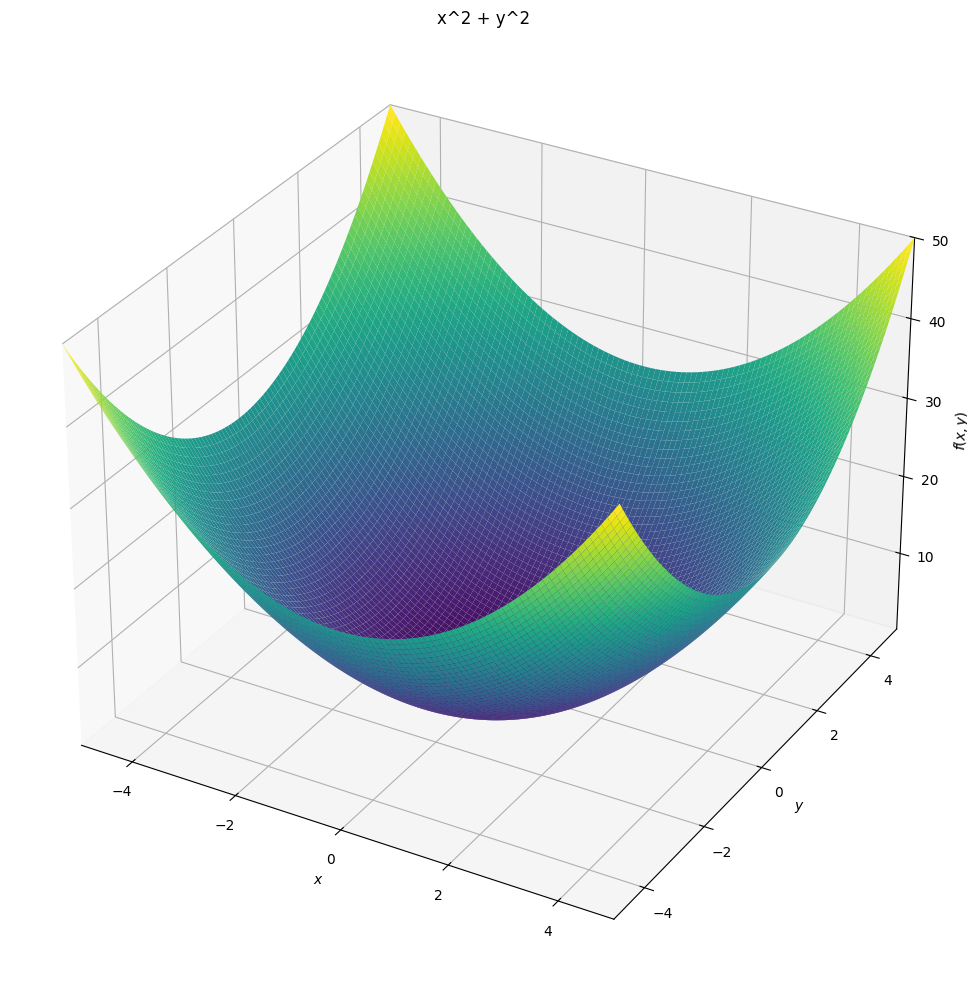

In [13]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x, y = symbols('x y')
plot3d(
  x ** 2 + y ** 2,
  (x, -5, 5), (y, -5, 5),
  title = "x^2 + y^2",
  size = (10, 10)
)

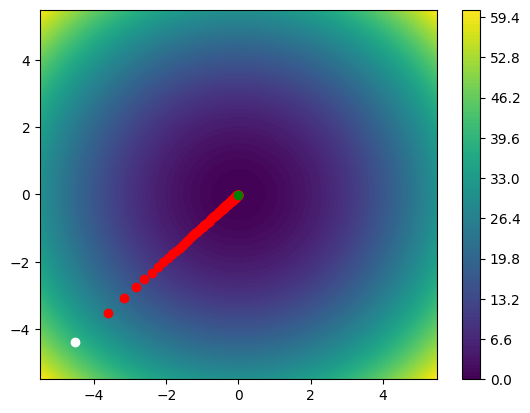

Punto mínimo: x = -0.0030, y = -0.0030, z = 0.0000


In [14]:
#Prepara los datos para dibujar mapa de niveles de Z
def descenso_de_gradiente(rango, resolucion, fun, fun_gradient, learning_rate = 0.1, tolerancia = 1e-6) -> list[float, float]:
  """
  Aplica descenso de gradiente a funciones de dos variables
  """
  X = np.linspace(-rango, rango, resolucion)
  Y = np.linspace(-rango, rango, resolucion)
  Z = np.zeros((resolucion, resolucion))
  for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
      Z[iy, ix] = fun([x, y])

  # Pinta el mapa de niveles de Z
  plt.contourf(X, Y, Z, resolucion)
  plt.colorbar()

  # Generamos un punto aleatorio inicial y pintamos de blanco
  punto = [ np.random.uniform(-rango, rango), np.random.uniform(-rango, rango) ]
  plt.plot(punto[0], punto[1], "o", c = "white")

  z_anterior, z = float("inf"), f(punto)

  iteraciones = 0
  # Descenso de gradiente
  # La learning rate se reduce con el tiempo
  while z - z_anterior < -tolerancia:
    iteraciones += 1
    grad = fun_gradient(punto)
    punto = [
        punto[0] - grad[0] * (learning_rate / math.log2(iteraciones + 1)),
        punto[1] - grad[1] * (learning_rate / math.log2(iteraciones + 1)),
    ]
    plt.plot(punto[0], punto[1], "o", c = "red")
    z_anterior, z = z, f(punto)


  # Dibujamos el punto final y pintamos de verde
  plt.plot(punto[0], punto[1], "o", c = "green")
  plt.show()
  return punto


resolucion = 100
rango = 5.5

solucion = descenso_de_gradiente(rango, resolucion, f, df)
print(f"Punto mínimo: x = {solucion[0]:.4f}, y = {solucion[1]:.4f}, z = {f(solucion):.4f}")


**¿Te atreves a optimizar la función?:**

$$\large f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
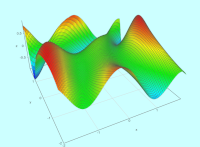


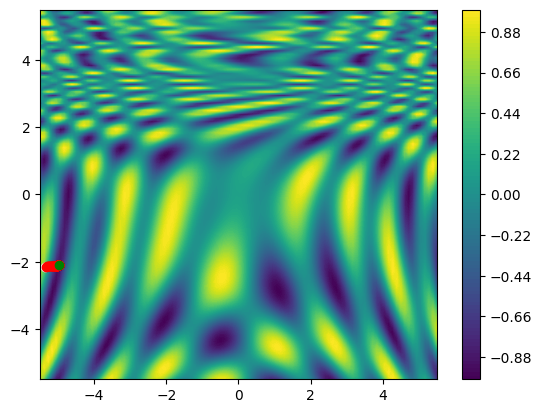

Punto mínimo: x = -4.9805, y = -2.1070, z = -0.9306


In [27]:
# Definimos la función
f = lambda x: math.sin(1/2 * x[0]**2 - 1/4 * x[1]**2 + 3) *math.cos(2*x[0] + 1 - math.exp(x[1]) )

def df(X):
    x, y = X
    A = (2 * x**2 - y**2 + 12) / 4
    B = 2 * x + 1 - math.exp(y)
    return [
        x * math.cos(A) * math.cos(B) - 2 * math.sin(A) * math.sin(B),
        -0.5 * math.cos(A) * math.cos(B) - math.exp(y) * math.sin(A) * math.sin(B)
    ]

solucion = descenso_de_gradiente(rango, resolucion, f, df, learning_rate = 0.01)
print(f"Punto mínimo: x = {solucion[0]:.4f}, y = {solucion[1]:.4f}, z = {f(solucion):.4f}")

El descenso de gradiente se "*atasca*" en mínimos locales porque la función no es convexa.